# Jupyter Notebook to demonstrate the basic plotting capabilities of the **SEABORN** library
### INCLUDED: An Elaborated Example: Exploring Marathon Finishing Times
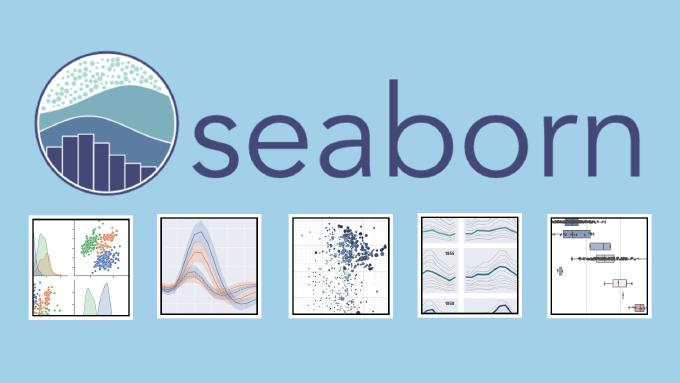

This Jupyter notebook provide **Seaborn** plotting examples and a tutorial to get started. You can execute jupyter notebook from your Python terminal to try out the notebooks locally on your own machine.
Alternatively you can upload the jupyter notebook e.g. to **colab.research.google.com** and try it out in a cloud notebook sandbox

---  
**Note**: *Seaborn* is a **data visualization library** built on top of *matplotlib* and closely integrated with *pandas* data structures in Python.  
Visualization is the central part of Seaborn which helps in exploration and understanding of data.

---  
Source/Links:
+ Use the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas for more information and full documentation  
+ https://github.com/jakevdp/PythonDataScienceHandbook
The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*


---

Author:
*   dr.daniel benninger  

History:
*   v1, June 2021, dbe --- minor adaptions for CAS BIA11
*   v2, Febr 2024, dbe --- minor corrections for BINA FS24 (e.g. depreciated parms, funcs)  
---  

# Visualization with Seaborn

### Introduction       
*Matplotlib* has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of [MATLAB](https://de.wikipedia.org/wiki/Matlab) circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires *a lot of boilerplate code*.
- Matplotlib predated *Pandas* by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.   

But for all the reasons just discussed, *Seaborn* remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a **simple random-walk plot in Matplotlib**, using its classic plot formatting and colors.  

We start with the typical imports:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [ ]:
# Create some random data (using numpy library functions)
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

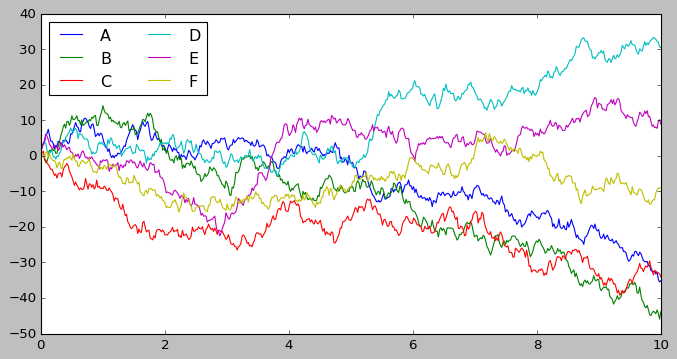

In [ ]:
# Plot the data with Matplotlib defaults
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a **look at how it works with Seaborn**.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.   

By convention, Seaborn is imported as ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

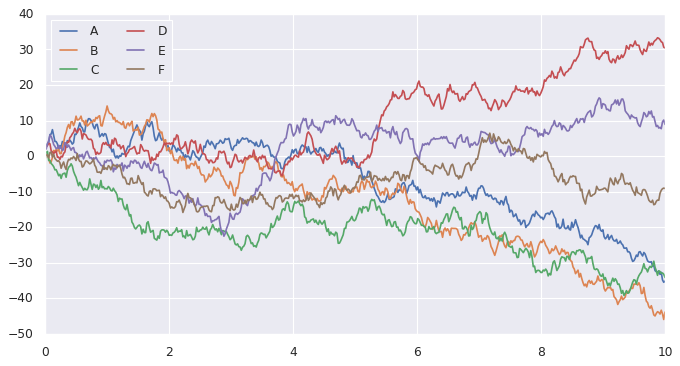

In [ ]:
# same plotting code as above!
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

---  
## Exploring Seaborn Plots

The main idea of Seaborn is that it **provides high-level commands to create a variety of plot types useful for statistical data exploration**, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn.   

Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.   

We have seen that this is relatively straightforward in Matplotlib:

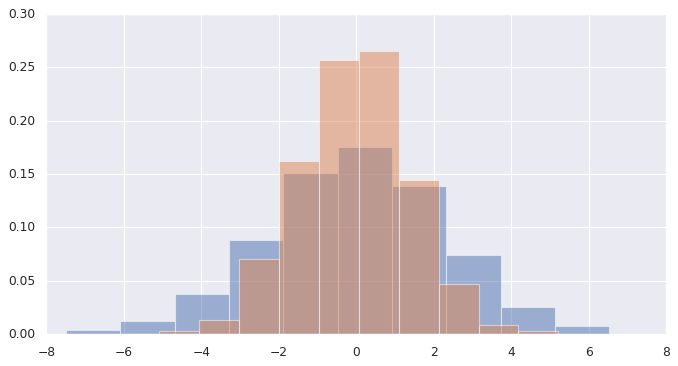

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

plt.figure(figsize=(10,5))
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation (KDE), which Seaborn does with ``sns.kdeplot``:

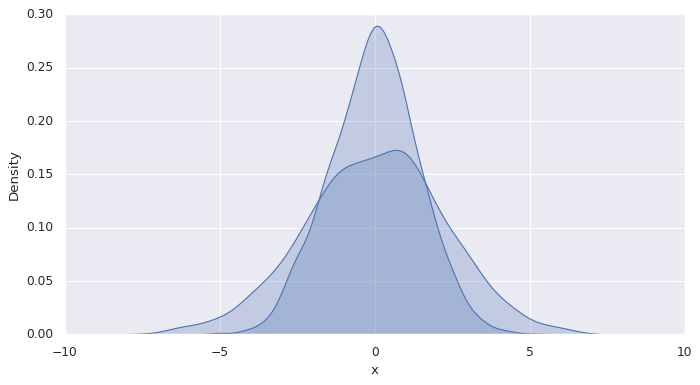

In [ ]:
plt.figure(figsize=(10,5))
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Histograms and KDE can be combined using ``displot``:

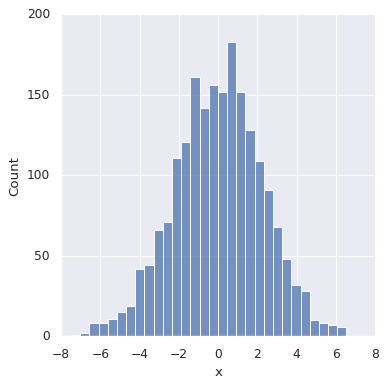

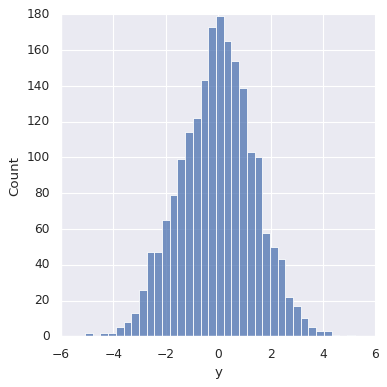

In [ ]:
sns.displot(data['x'])
sns.displot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

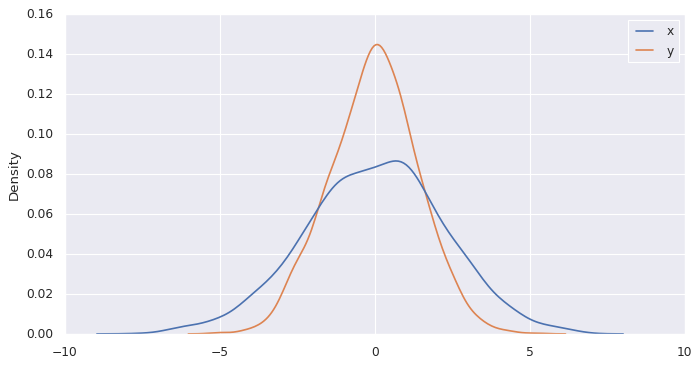

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.   

For this plot, we'll set the style to a white background:

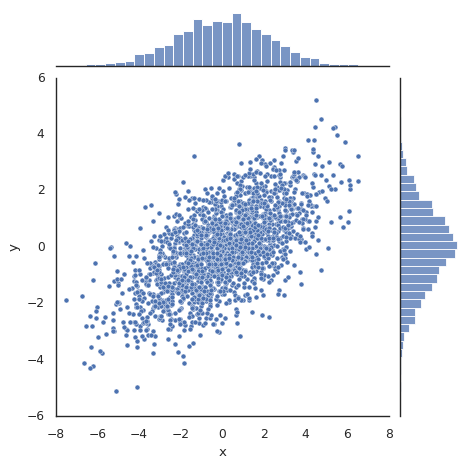

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y");

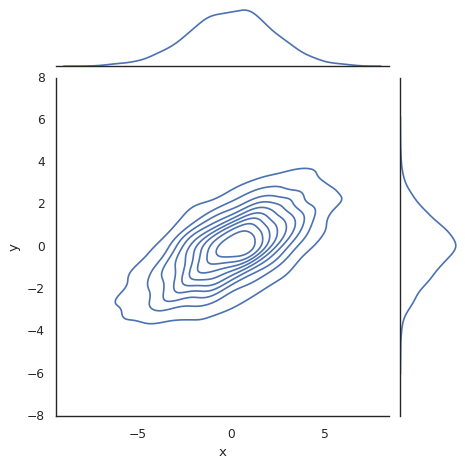

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

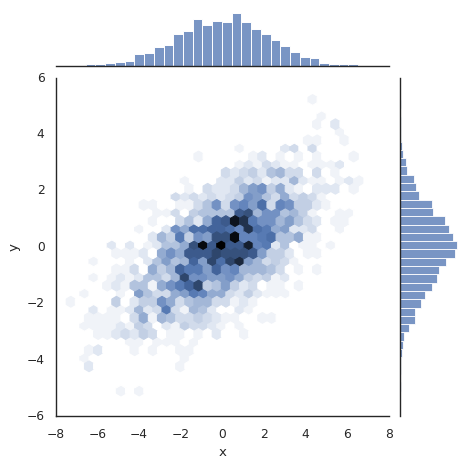

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with **pair plots**. This is very useful for **exploring correlations between multidimensional data**, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known **Iris dataset**, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

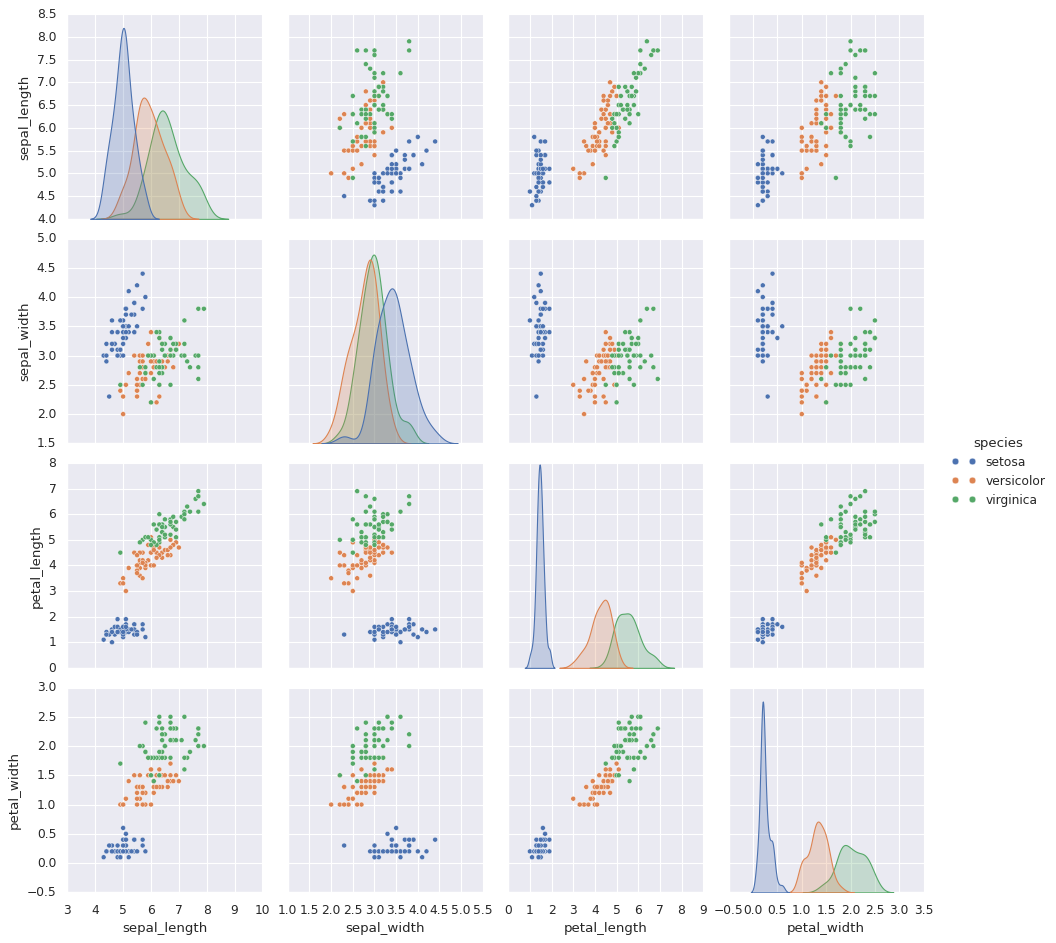

In [ ]:
sns.pairplot(iris, hue='species', height=3);

### Faceted histograms

Sometimes the best way to view data is via **histograms of subsets**. Seaborn's ``FacetGrid`` makes this extremely simple.  

We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


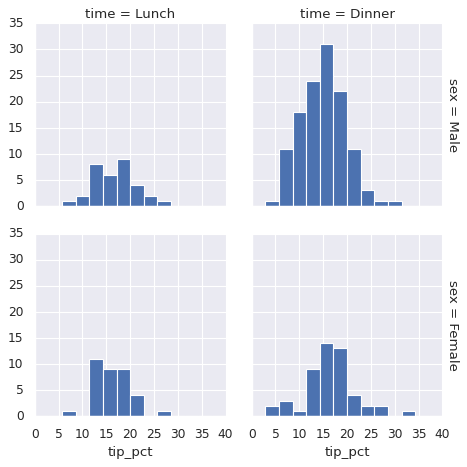

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor or Category plots

Factor or Category plots can be useful for this kind of visualization as well. This allows you to view the **distribution of a parameter** within bins defined by any other parameter:

<Figure size 1200x400 with 0 Axes>

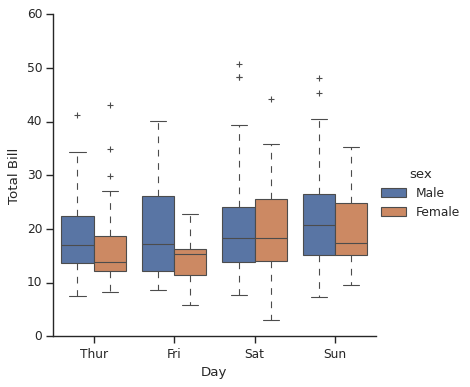

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to **show the joint distribution between different datasets**, along with the associated marginal distributions:

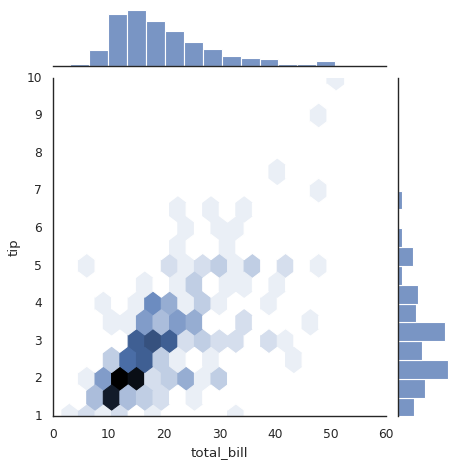

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data=tips, x="total_bill", y="tip",  kind='hex')

The joint plot can even do some automatic **kernel density estimation** and **regression**:

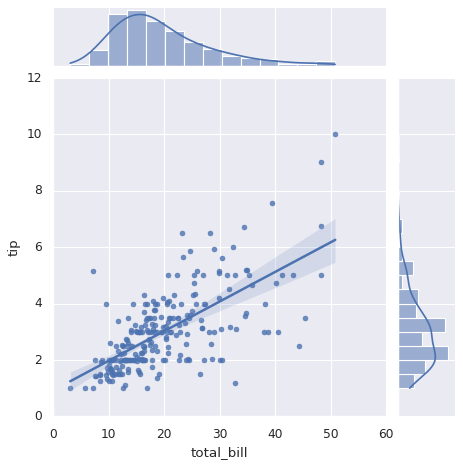

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind='reg')

# and save the plot as PNG file
plt.savefig("seaborn_jointplot.png")

### Bar plots

Time series can be plotted using ``sns.factorplot``.  

In the following example, we'll use the **Planets dataset**:

In [ ]:
planets = sns.load_dataset('planets')
planets.head(20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


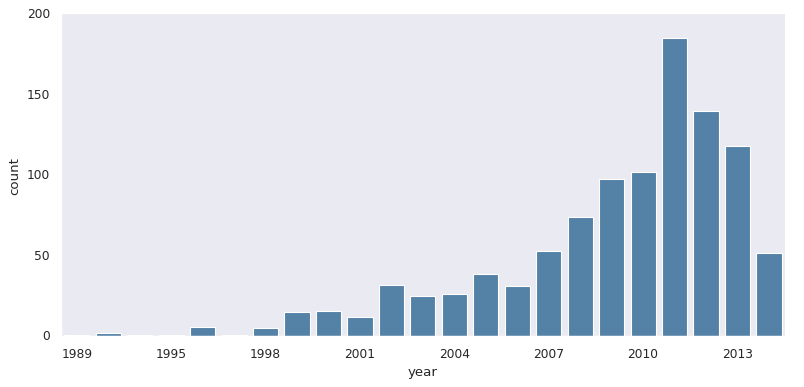

In [ ]:
with sns.axes_style('dark'):
    g = sns.catplot(x="year", data=planets, aspect=2, color='steelblue', kind='count')
    g.set_xticklabels(step=3)

We can learn more by looking at the *method* of discovery of each of these planets:

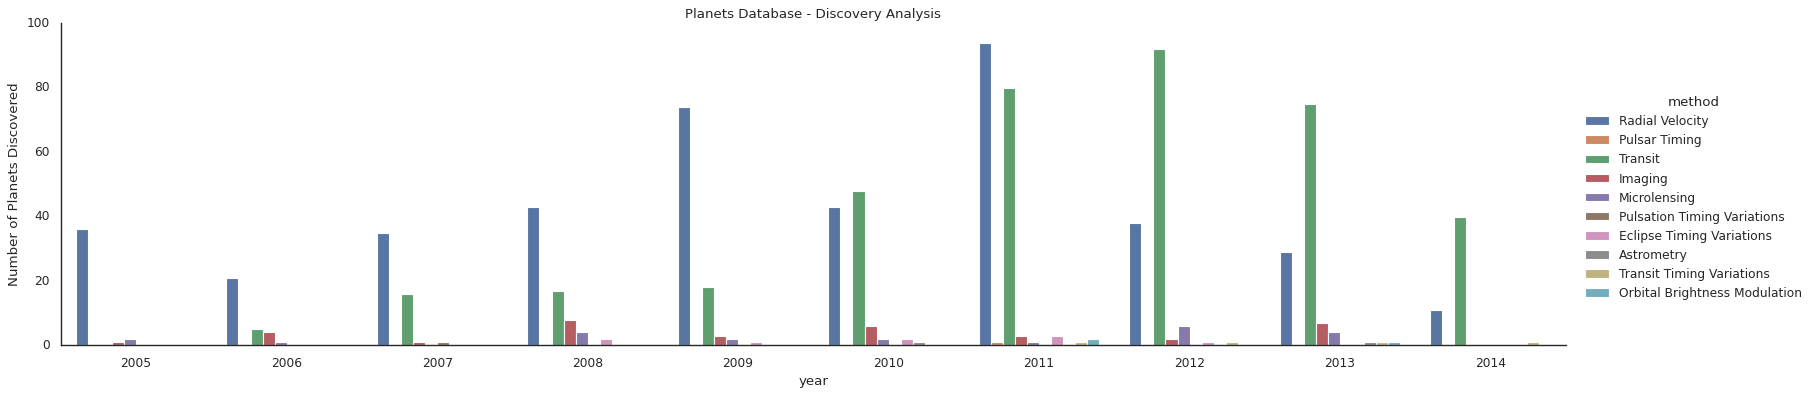

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, hue='method', kind='count',order=range(2005, 2015))

    g.set(title='Planets Database - Discovery Analysis')
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/tutorial.htm),    
and the [**Seaborn Gallery**](http://seaborn.pydata.org/examples/index.html).

---   
---  
# An Elaborated Example: **Exploring Marathon Finishing Times**

Here we'll look at using Seaborn to help **visualize and understand finishing results from a marathon**.

I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded
(if you are interested in using Python for web scraping, I would recommend [*Web Scraping with Python*](http://shop.oreilly.com/product/0636920034391.do) by Ryan Mitchell).

We will start by downloading the data from the Web (github repository), and loading it into *Pandas*:

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [ ]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing **a converter for the times**:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

That looks much better.   
For the purpose of our Seaborn plotting utilities, let's next **add columns** that give the times in seconds:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

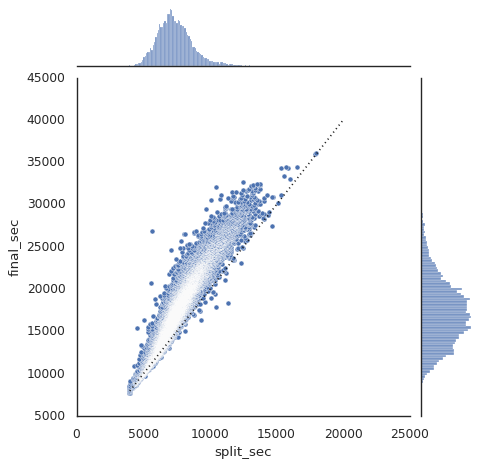

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot(data, x="split_sec", y="final_sec")
    g.ax_joint.plot(np.linspace(4000, 20000),
                    np.linspace(8000, 40000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Now, let's **create another column in the data**, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.  
Let's do a **distribution plot** of this split fraction:

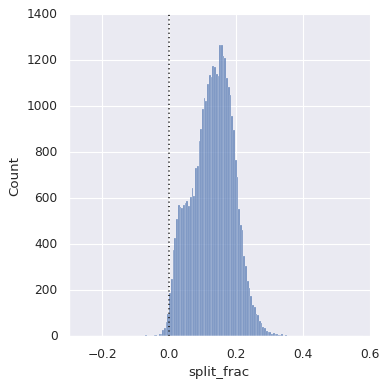

In [ ]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle=":")

In [ ]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any **correlation** between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

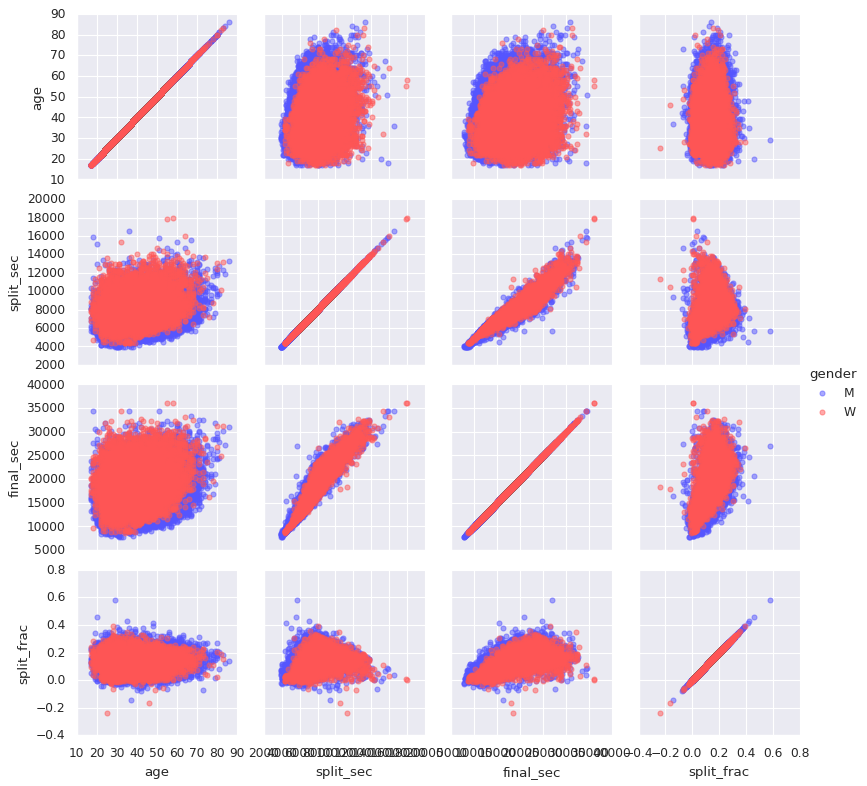

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='seismic')
g.map(plt.scatter, alpha=0.5)
g.add_legend();

**It looks like the split fraction does not correlate particularly with age, but does correlate with the final time**: *faster runners tend to have closer to even splits on their marathon time*.  

(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

**The difference between men and women here is interesting**.   Let's look at the *histogram of split fractions* for these two groups:

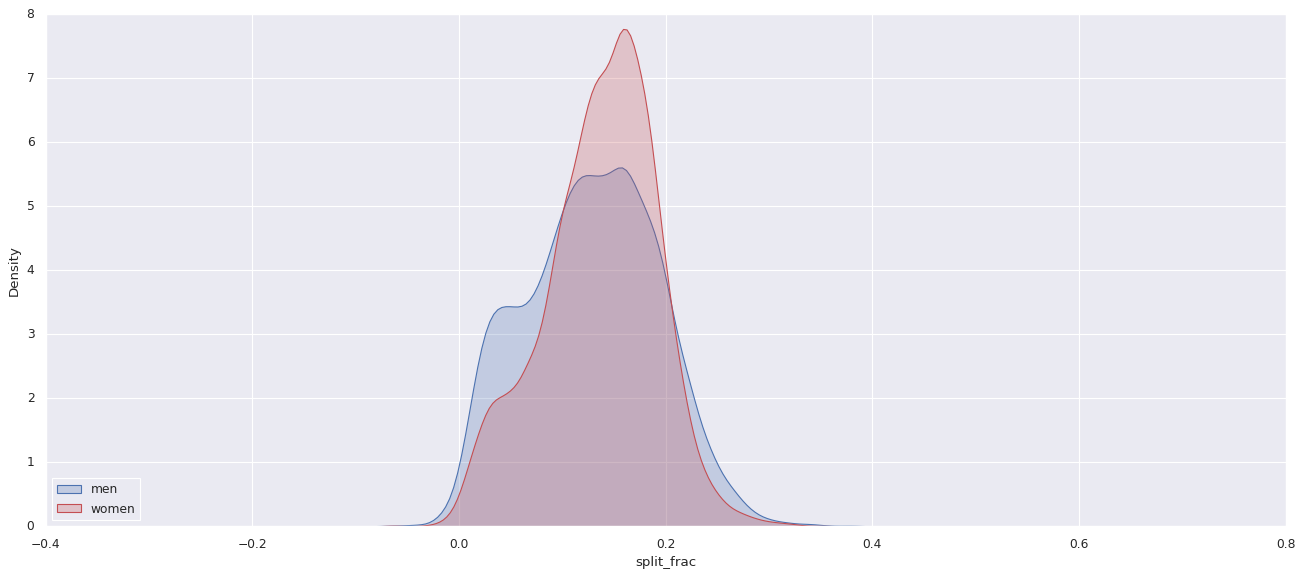

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True, color="b")
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True, color="r")
plt.xlabel('split_frac')
plt.legend(loc="lower left")

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a **violin plot**

<ipython-input-147-8e01f976a12c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="gender", y="split_frac",


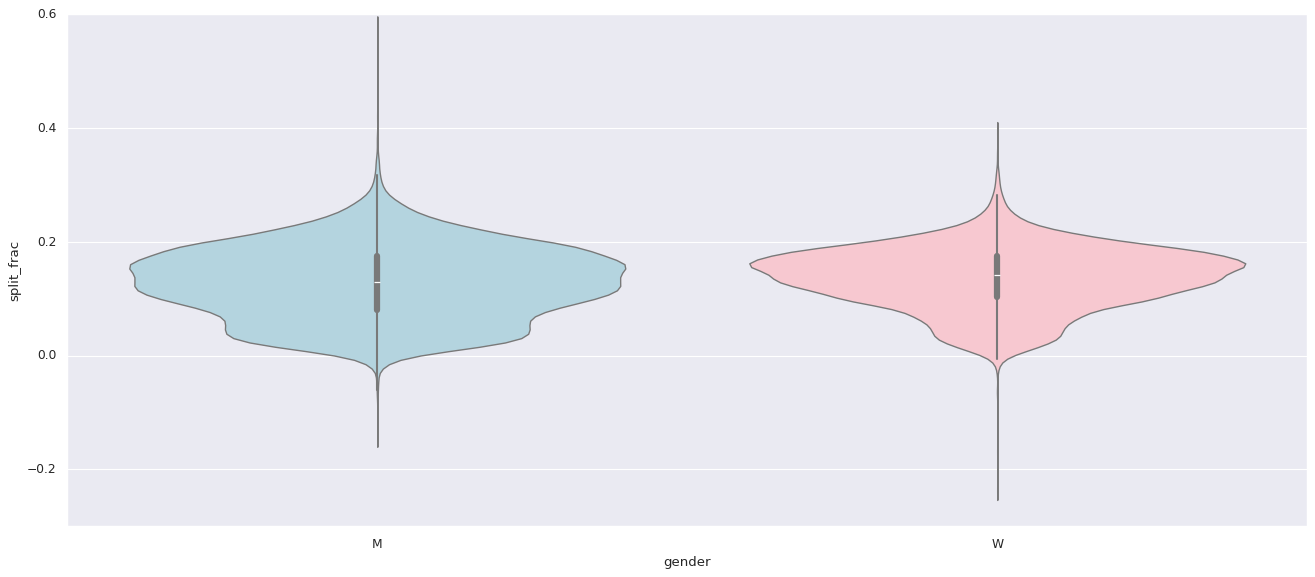

In [ ]:
sns.violinplot(data=data, x="gender", y="split_frac",
               palette=["lightblue", "pink"]);

This is yet another way to compare **the distributions between men and women**.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


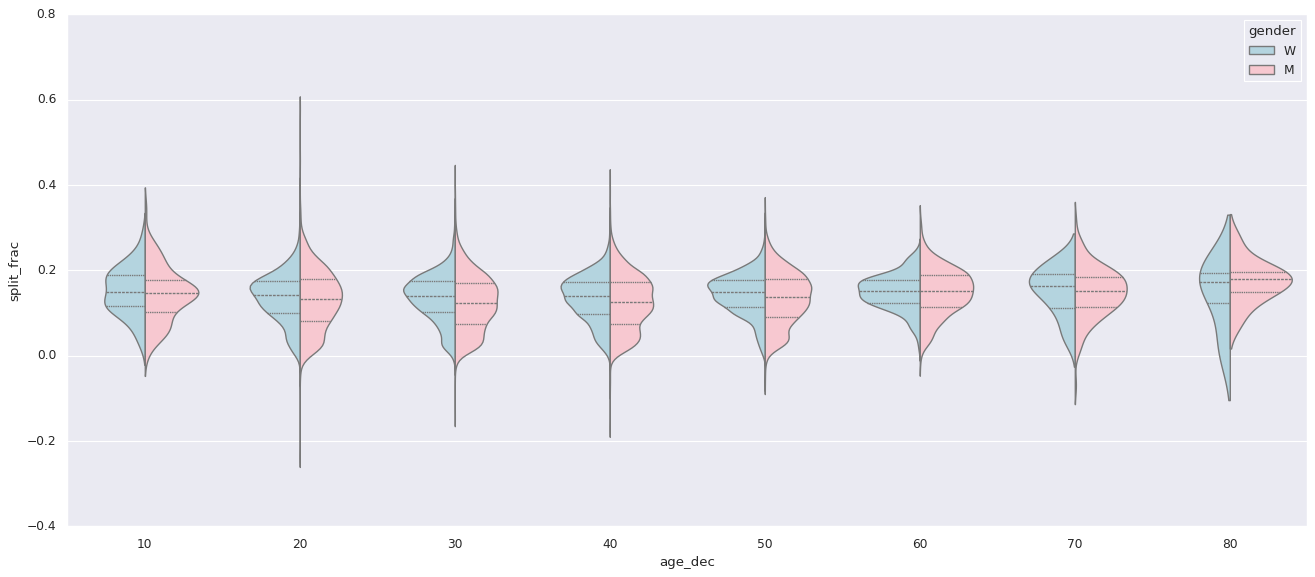

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(data=data, x="age_dec", y="split_frac", hue="gender",
                   split=True, inner="quartile",
                   palette=["lightblue", "pink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

**Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range**:

In [ ]:
(data.age > 80).sum()

7

**Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly?**  

We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

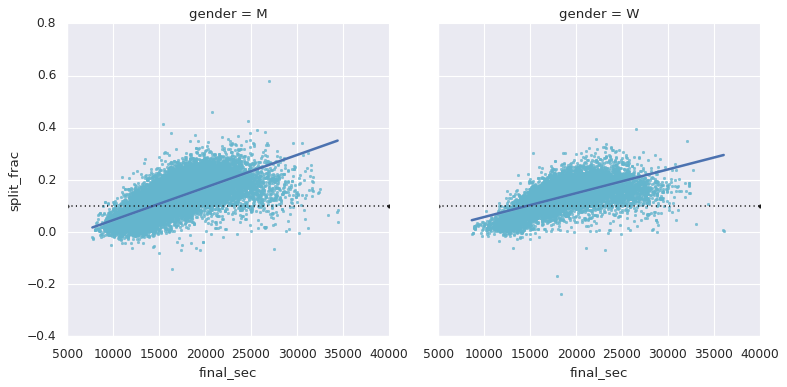

In [ ]:
g = sns.lmplot(data=data, x='final_sec', y='split_frac', col='gender',
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.